In [3]:
import numpy as np
from numpy.random import choice, randn
from matplotlib import pyplot as plt
%matplotlib inline
import itertools


# Integer-based shuffling keys

In [201]:
k = 9
x0 = np.arange(k) - (k-1)/2
x0

array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

In [202]:
def build_shuffle_matrix(x0, tolerance = 0):
    xs = [x0]
    x1 = x0
    arr = np.array(list(itertools.permutations(x0)))
    flag = True
    while flag:
        dp = np.abs(np.dot(arr, x1.T))
        if np.min(dp) > tolerance:
            flag = False
        else:
            inds = np.argsort(dp)[:(np.sum(dp <= tolerance))]
            arr = arr[inds]
            x1 = arr[0]
            xs.append(x1)
    return np.array(xs)


In [213]:
x = build_shuffle_matrix(x0, 38)
print(len(x))
x[:10]

62


array([[-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-2.,  2.,  1., -1.,  0.,  4., -4., -3.,  3.],
       [ 1.,  2., -3.,  0., -2., -1.,  4., -4.,  3.],
       [ 3.,  4.,  2., -4., -2.,  1., -3., -1.,  0.],
       [ 1., -1.,  0.,  2., -2., -3., -4.,  4.,  3.],
       [-1.,  4.,  2., -4.,  1., -3.,  0.,  3., -2.],
       [-1.,  3., -4.,  4.,  1.,  0., -3.,  2., -2.],
       [-2.,  4.,  0.,  1., -3., -4.,  3., -1.,  2.],
       [ 2., -2.,  1.,  0.,  3., -3., -1., -4.,  4.],
       [ 2.,  1.,  3., -2., -3., -4.,  4.,  0., -1.]])

In [214]:
#x = np.array([choice(x0, k, replace = False) for i in range(20)])
#x

In [215]:
np.dot(x, x.T)[-5:, -5:]

array([[ 60.,   1., -38.,  -3.,   8.],
       [  1.,  60.,   1.,  17.,  10.],
       [-38.,   1.,  60.,   2.,  -7.],
       [ -3.,  17.,   2.,  60.,  -3.],
       [  8.,  10.,  -7.,  -3.,  60.]])

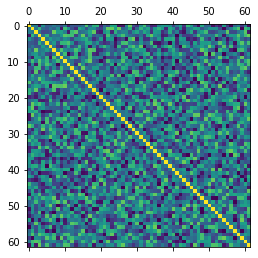

In [216]:
plt.matshow(np.dot(x, x.T))

In [217]:
projs = randn(k, 5000000)

In [218]:
prods = np.dot(x, projs).T

In [219]:
ords = [tuple(np.argsort(r)) for r in prods]
len(set(ords))

5000000

In [220]:
np.math.factorial(len(x))

31469973260387937525653122354950764088012280797258232192163168247821107200000000000000

In [221]:
ords = np.array(list(set(ords)))

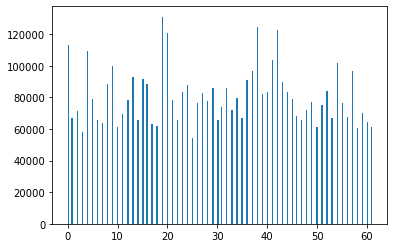

In [246]:
plt.hist(ords[:, 0], 240)
plt.show()

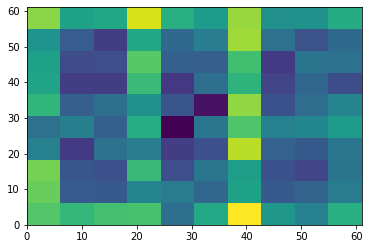

In [245]:
plt.hist2d(ords[:, 0], ords[:, 21])
plt.show()